In [1]:
import numpy as np
import math
import os
# import imageio
from barrier3d import Barrier3d
from cascade.outwasher_reorgSHORT import Outwasher
from cascade.outwasher_reorgSHORT import (plot_ElevAnimation, plot_DischargeAnimation, plot_SlopeAnimation, 
plot_Qs2Animation, plot_SedOutAnimation, plot_SedInAnimation)
import matplotlib.pyplot as plt
import imageio
import csv

In [2]:
with open(r"C:\Users\Lexi\Documents\Research\Outwasher\chris stuff\sound_data.txt", newline='') as csvfile:
    sound_data = list(csv.reader(csvfile))[0]
sound_data = [float(s) / 10 - 0.054 for s in sound_data]  # [dam MHW] Chris' sound elevations were in m MSL,
# so converted to NAVD88 then MHW and dam
sound_data = [s + 0.05 for s in sound_data]  # [dam MHW] just increasing the values
# setting all negative values to 0
sound_data = sound_data[20:]
# for index, value in enumerate(sound_data):
#     #     # smaller used 0.05
#     if value > 0.220:
#         sound_data[index] = 0.220
sound_data[0] = 0

<div class="alert alert-block alert-info"><b>Configuration:</b> Substep = 2, Cx = 10, Ki = 7.5x10$^{-3}$.
    Apply a fudge factor to the first row to simulate appropriate flows at the dune gaps: sum all cellular discharges through gaps and divide by the alongshore length. Multiply by a fudge factor (2)
</div>

In [3]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "C:/Users/Lexi/Documents/Research/Outwasher/Output/edgesedited_bay220limited/discharge_comp/"
runID = "no_dune_erosion_FF2SHORT_fullhydro_Kie-3_substep2"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=2, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS \
    = outwash.update(storm_series, b3d, fudge_fac=2)

0
1
2
3
4
5
6
calculated discharge through gaps: [6.10927907 6.10927907 6.10927907 6.10927907 6.10927907 0.
 0.         0.         0.         0.         0.         2.48858982
 2.48858982 2.48858982 0.         0.         0.         2.72445496
 0.         0.         8.16814998 8.16814998 8.16814998 0.
 0.         3.6606851  0.         0.         0.         0.
 0.         7.29543891 7.29543891 7.29543891 7.29543891 0.
 0.         0.         6.20632221 6.20632221 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
discharge at dune gaps after flow routing: [4.61919661 8.13025147 6.94453448 7.36089876 7.30996597 7.54880467
 6.00946701 6.56095867 6.51115601 7.02947072 6.41232842 7.30766243
 6.50705884 7.09074075 6.62668308 6.59634579 5.9398588  6.76026248
 7.23463385 5.99077245 7.59373138 7.30528151 7.04949105 6.71867469
 6.30862125 6.75762425 7.36825639 6.03035409 7.02018099 6.46281365
 5.80305345 7.23795334 6.90993383 7.17254695 7.68297218 6.849

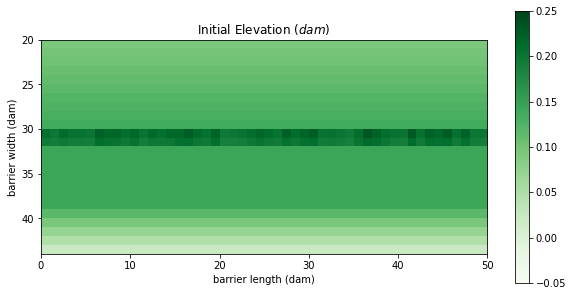

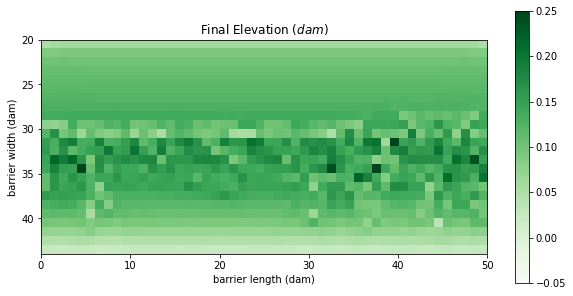

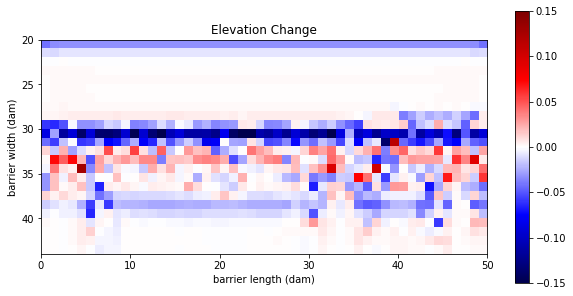

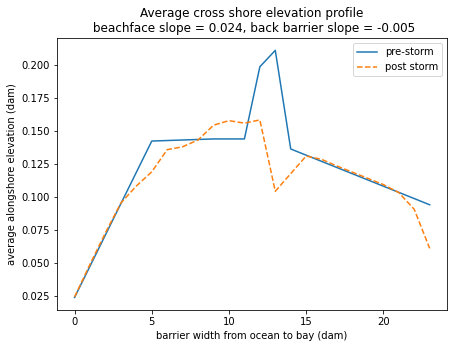

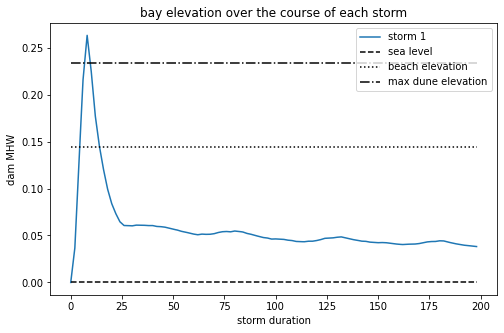

[ * elevation GIF successfully generated * ]

[ * discharge GIF successfully generated * ]

[ * slope GIF successfully generated * ]

[ * SedOut GIF successfully generated * ]

[ * SedIn GIF successfully generated * ]


In [4]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    extent=[0, outwash._length, np.shape(initial_domain)[0]+20, 20],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain,
    extent=[0, outwash._length, np.shape(final_domain)[0]+20, 20],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    extent=[0, outwash._length, np.shape(final_domain)[0]+20, 20],
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(outwash._m_beachface, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    
### GIFS------------------------------------------------------------------------------------------------------------------------

start = OW_TS[0]
stop = OW_TS[-1]
dir = newpath
plot_ElevAnimation(elev_change, dir, start, stop)
plot_DischargeAnimation(discharge, dir, start, stop)
plot_SlopeAnimation(slopes2, dir, start, stop)
# plot_Qs2Animation(qs2, dir, TMAX)
plot_SedOutAnimation(sedout, dir, start, stop)
plot_SedInAnimation(sedin, dir, start, stop)
# time_step = [0]
# plot_ModelTransects(b3d, time_step)

In [4]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "C:/Users/Lexi/Documents/Research/Outwasher/Output/edgesedited_bay220limited/discharge_comp/"
runID = "no_dune_erosion_FF2SHORT_fullhydro_Kie-3_substep20"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=20, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS \
    = outwash.update(storm_series, b3d, fudge_fac=2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
calculated discharge through gaps: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
discharge at dune gaps after flow routing: [0.23189542 0.4081593  0.3486333  0.36953584 0.36697889 0.3789692
 0.30169053 0.32937681 0.32687659 0.35289731 0.3219152  0.36686324
 0.32667091 0.35597322 0.33267635 0.33115334 0.29819602 0.33938237
 0.36319702 0.30075202 0.38122463 0.36674371 0.35390238 0.33729456
 0.31670883 0.33924993 0.36990521 0.30273911 0.35243094 0.32444968
 0.29132804 0.36336367 0.34689625 0.3600801  0.38570475 0.34388551
 0.27920972 0.31642742 0.35003077 0.36429142 0.37095649 0.28491395
 0.36988193 0.31967064 0.33767321 0.30811827 0.38219068 0.32810534
 0.40309781 0.25124048]
57
calculated discharge through gaps: [0.       

discharge at dune gaps after flow routing: [ 7.25998861 12.84812145 10.9252931  11.59046813 11.51337705 11.93927562
  9.45294192 10.32935602 10.25532068 11.07841421 10.08839407 11.55762549
 10.23934342 11.16887173 10.44148768 10.39029994  9.34514905 10.65205457
 11.42867529  9.41301826 12.00463836 11.50566871 11.10399335 10.58352927
  9.9260749  10.64172485 11.64887035  9.48457368 11.06689834 10.17567732
  9.12669784 11.4397461  10.87177004 11.28614449 12.15245562 10.81131824
  8.73921374  9.91827113 11.0068405  11.43197471 11.66343506  8.9050763
 11.73484814 10.01005807 10.56974801  9.6473113  12.11050839 10.25860324
 12.69594303  7.86594003]
64
calculated discharge through gaps: [ 9.25599027  9.25599027  9.25599027  9.25599027  9.25599027  9.25599027
  9.25599027  9.25599027  9.25599027  9.25599027  9.25599027  9.25599027
  9.25599027  9.25599027  9.25599027  0.          0.          9.27461671
  9.27461671  9.27461671  9.27461671  9.27461671  9.27461671  9.27461671
  9.27461671  9.27

discharge at dune gaps after flow routing: [20.65380024 42.5004445  31.93025782 34.48057911 34.54788336 37.77359561
 27.91460582 30.84445837 30.72272229 33.94263809 29.58115091 37.73085367
 30.17844324 33.43937786 31.56673057 31.26818026 27.65635179 32.31251959
 35.62715602 27.39716643 37.75904705 34.54797173 33.44393815 31.87708806
 29.41654204 31.90432062 36.70037622 27.90258991 34.06355143 30.37706397
 26.86654677 35.89017772 31.94666627 33.07793068 40.57891824 33.22206882
 25.17264921 29.37795817 34.1060148  34.62160272 36.00158498 25.58317387
 39.03764599 29.458828   30.94867358 28.19742607 40.58577163 29.50412984
 40.01392688 22.99519729]
71
calculated discharge through gaps: [26.59833087 26.59833087 26.59833087 26.59833087 26.59833087 26.59833087
 26.59833087 26.59833087 26.59833087 26.59833087 26.59833087 26.59833087
 26.59833087 26.59833087 26.59833087 26.59833087 26.59833087 26.59833087
 26.59833087 26.59833087 26.59833087 26.59833087 26.59833087 26.59833087
 26.59833087 26.5

discharge at dune gaps after flow routing: [ 18.52485274 158.8162523   43.46965966  68.33250473  53.53345053
 161.2754757   38.53852825  58.63895076  63.30592675  88.68712545
  57.50813781 101.4295331   55.16890505  75.75321367  77.33649136
  74.02139007  46.95042882  75.91051463  93.76172362  34.55437387
 134.39039709  66.88263044  82.85741858  62.69785829  53.30073462
  76.57139036  99.30754082  43.45146663  98.32381684  63.37197038
  43.68290289  95.65315184  41.88345361  33.14617949 241.85134891
  48.97964064  20.20682033  41.46883775 107.46823759  75.67211254
 111.24348615  35.33050737  91.40009717  63.27912775  64.65417621
  51.85520794  73.76325115  19.19736442 231.43895873   0.        ]
78
calculated discharge through gaps: [51.13869549 51.13869549 51.13869549 51.13869549 51.13869549 51.13869549
 51.13869549 51.13869549 51.13869549 51.13869549 51.13869549 51.13869549
 51.13869549 51.13869549 51.13869549 51.13869549 51.13869549 51.13869549
 51.13869549 51.13869549 51.13869549 51

discharge at dune gaps after flow routing: [  0.         203.25505356   6.04545441  12.87744556   9.15225531
 369.80582447   5.50182009   7.28758907   7.47741087 164.62420198
   0.         238.94299176   0.           0.         229.8694203
   0.           0.           0.         246.925474     0.
 179.85385272   0.         203.15918285   0.           0.
   0.         237.86499182   0.         176.14611165   0.
   0.         214.3618309    0.           0.         275.45108155
 107.14646238   0.           0.         109.82371599   0.
 242.64684651   0.         200.38620693  11.81174344   8.64438536
   7.74749979 165.23295485   0.         217.85959271   0.        ]
85
calculated discharge through gaps: [43.37473373 43.37473373 43.37473373 43.37473373 43.37473373 43.37473373
 43.37473373 43.37473373 43.37473373 43.37473373 43.37473373 43.37473373
 43.37473373 43.37473373 43.37473373 43.37473373 43.37473373 43.37473373
 43.37473373 43.37473373 43.37473373 43.37473373 43.37473373 43.37473373

91
calculated discharge through gaps: [26.80907938 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938
 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938
 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938
 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938
 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938
 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938
 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938
 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938 26.80907938
  0.          0.        ]
discharge at dune gaps after flow routing: [  0.         113.90967997   0.           0.           0.
 155.97022244   0.           0.           0.         202.48728371
   0.         164.12138166   0.           0.         127.67319114
  20.78015412   1.82839448   4.98515134  25.43255737   0.
 195.75064526   0.         124.32276541   6.03867876   4.7016

98
calculated discharge through gaps: [11.87157002 11.87157002 11.87157002 11.87157002 11.87157002 11.87157002
 11.87157002 11.87157002 11.87157002 11.87157002 11.87157002 11.87157002
 11.87157002 11.87157002 11.87157002 11.87157002 11.87157002 11.87157002
 11.87157002 11.87157002 11.87157002 11.87157002 11.87157002 11.87157002
 11.87157002 11.87157002 11.87157002 11.87157002 11.87157002  0.
  0.         20.55774965 20.55774965 20.55774965 20.55774965  0.
  0.         14.31756245 14.31756245 14.31756245  0.          0.
  8.77721995  8.77721995  8.77721995  8.77721995  8.77721995  8.77721995
  0.          0.        ]
discharge at dune gaps after flow routing: [  0.          53.83022558   0.           0.           0.
  76.01834259   0.           0.           0.         125.02978086
   0.          60.65679318   0.           0.          76.16075071
   0.           0.           0.          20.08285519   0.
 106.50879506   0.          84.45021076   0.           0.
   0.          15.42634356 

106
calculated discharge through gaps: [2.95622378 0.         0.         3.36255066 3.36255066 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         3.87129677 3.87129677 3.87129677 0.
 0.         0.         0.         0.         0.         0.
 0.         3.19925564 3.19925564 3.19925564 3.19925564 0.
 0.         0.         2.38851022 2.38851022 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
discharge at dune gaps after flow routing: [ 0.          8.14526683  0.          0.          0.         18.09954719
  0.          0.          0.         22.58191864  0.         11.41776155
  0.          0.         10.89089923  1.81574378  0.          0.
  2.38136708  0.         21.70081523  0.         17.06558614  0.
  0.          0.          4.12610358  0.         14.83701877  0.
  0.         14.30381857  0.          0.         19.45002253  0.
  0.          0.

1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760


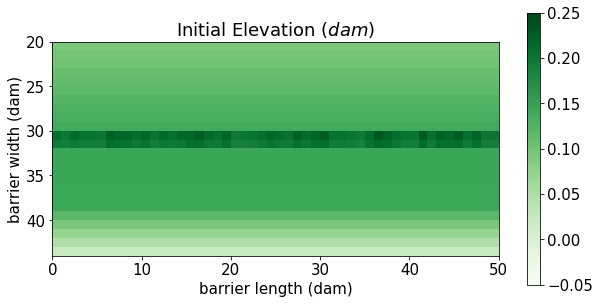

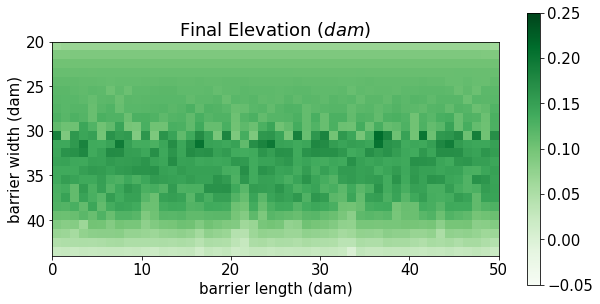

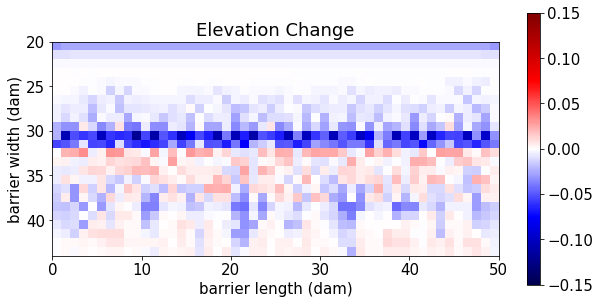

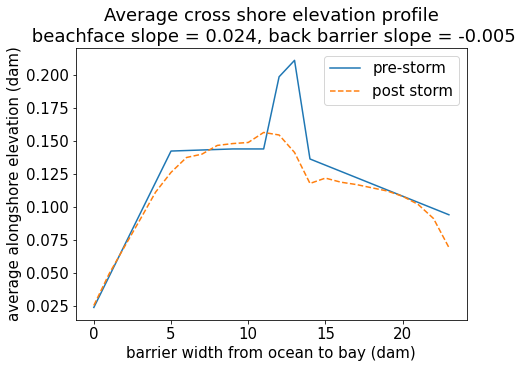

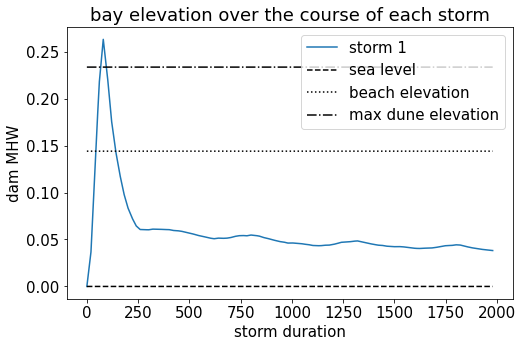

[ * elevation GIF successfully generated * ]

[ * discharge GIF successfully generated * ]

[ * slope GIF successfully generated * ]

[ * SedOut GIF successfully generated * ]

[ * SedIn GIF successfully generated * ]


In [6]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    extent=[0, outwash._length, np.shape(initial_domain)[0]+20, 20],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain,
    extent=[0, outwash._length, np.shape(final_domain)[0]+20, 20],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    extent=[0, outwash._length, np.shape(final_domain)[0]+20, 20],
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(outwash._m_beachface, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    
### GIFS------------------------------------------------------------------------------------------------------------------------

start = OW_TS[0]
stop = OW_TS[-1]
dir = newpath
plot_ElevAnimation(elev_change, dir, start, stop)
plot_DischargeAnimation(discharge, dir, start, stop)
plot_SlopeAnimation(slopes2, dir, start, stop)
# plot_Qs2Animation(qs2, dir, TMAX)
plot_SedOutAnimation(sedout, dir, start, stop)
plot_SedInAnimation(sedin, dir, start, stop)
# time_step = [0]
# plot_ModelTransects(b3d, time_step)